In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
dataset=pd.read_csv('Social_Network_Ads.csv')
x=dataset.iloc[:,2:4]
y=dataset.iloc[:,-1]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [37]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=0)

In [38]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [39]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

In [40]:
x_train

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [41]:
x_test

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [43]:
y_pred = classifier.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [45]:
cm

array([[74,  5],
       [11, 30]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8666666666666667


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


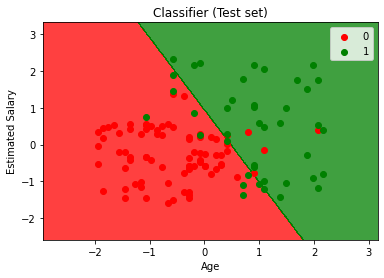

In [47]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                               stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1,
                               stop = x_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
